# Estadística sobre las Trayectorias.
Varias medidas en busca de significado estadístico de los cálculos de las trayectorias de los Centros de Masa, definidos en el Notebook TrackingtheTracks.

In [15]:
using JLD
using PyPlot
using StatsBase, Statistics
push!(LOAD_PATH,"./")
cm2p=1/2.54;

In [16]:
using TrayectoriasAux

In [17]:
Datos=load("../JLDFiles/TrabajandoCentrosdeMasa/140116s2cut2_evento_2-Tray.jld")

Dict{String,Any} with 2 entries:
  "CatenarioPositivo" => Dict{Integer,Array{Any,N} where N}(288=>[54.8467 51.07…
  "CatenarioNegativo" => Dict{Integer,Array{Any,N} where N}(288=>[59.8269 18.16…

In [18]:
CatenarioPozos=Datos["CatenarioNegativo"]
CatenarioFuentes=Datos["CatenarioPositivo"];

In [33]:
CatenarioFuentes[485]
tmax=1765/freq

251.35289091426944

In [34]:
dispozos=TrayectoriasAux.distprom(CatenarioPozos);
disfuentes=TrayectoriasAux.distprom(CatenarioFuentes)
length(disfuentes)

485

In [35]:
distie=42 #distancia inter electrodo
freq=7.022
cajas=0:25:400

tantos=length(dispozos)
vspozos=zeros(tantos)


for j in 1:tantos
    vspozos[j]=dispozos[j]
end
# la vs esta en unidades "de la MEA", asi que... escalas
vspozos=vspozos*distie*freq;
histvpozos=fit(Histogram, vspozos, cajas,closed=:right)

tantos=length(disfuentes)
vsfuentes=zeros(tantos)
for j in 1:tantos
    vsfuentes[j]=disfuentes[j]
end
# la vs esta en unidades "de la MEA", asi que... escalas

vsfuentes=vsfuentes*distie*freq;
histvfuentes=fit(Histogram, vsfuentes, cajas,closed=:right)


Histogram{Int64,1,Tuple{StepRange{Int64,Int64}}}
edges:
  0:25:400
weights: [13, 37, 42, 61, 78, 90, 63, 40, 23, 19, 8, 8, 1, 0, 1, 0]
closed: right
isdensity: false

In [36]:
centroshistopozos=(histvpozos.edges[1][2:end]+histvpozos.edges[1][1:end-1])/2
centroshistofuentes=(histvfuentes.edges[1][2:end]+histvfuentes.edges[1][1:end-1])/2

ancho=15
mvp, mvf = (round(Int, mean(vspozos)), round(Int, mean(vsfuentes)) )

(150, 131)

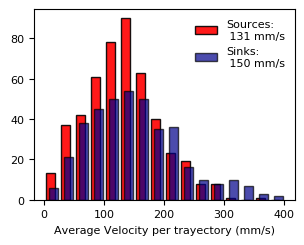

In [37]:


fu=figure(figsize=(8*cm2p,6.5*cm2p))
fs=8

xlabel("Average Velocity per trayectory (mm/s)", fontsize=fs)

#ylabel("Total Count", fontsize=fs)
xticks(fontsize=fs)
yticks(fontsize=fs)

bar(centroshistofuentes.-2, histvfuentes.weights, ancho, color="red", 
    alpha=0.9, edgecolor="black", lw=1, label="Sources:\n $mvf mm/s")
bar(centroshistopozos.+4, histvpozos.weights, ancho, 
    color="darkblue", alpha=0.7, edgecolor="black", lw=1, label="Sinks:\n $mvp mm/s")
#annotate()
legend(loc=1, fontsize=fs, frameon=false)

tight_layout()


savefig("HistogramVelocities-140116s2cut2_evento_2.svg",dpi=90)
savefig("HistogramVelocities-140116s2cut2_evento_2.png",dpi=90)

In [38]:
dist2D(xx::Array, yy::Array)=dist(xx[1], yy[1], xx[2], yy[2])

function distanciasAcumuladas(cadena::Array)
    jmax,bla=size(cadena)
    result=zeros(jmax)
    acu=0
    for j=1:jmax-1
        acu+=dist2D(cadena[j,:],cadena[j+1,:])
        result[j+1]=acu
    end
    return result
end

distanciasAcumuladas (generic function with 1 method)

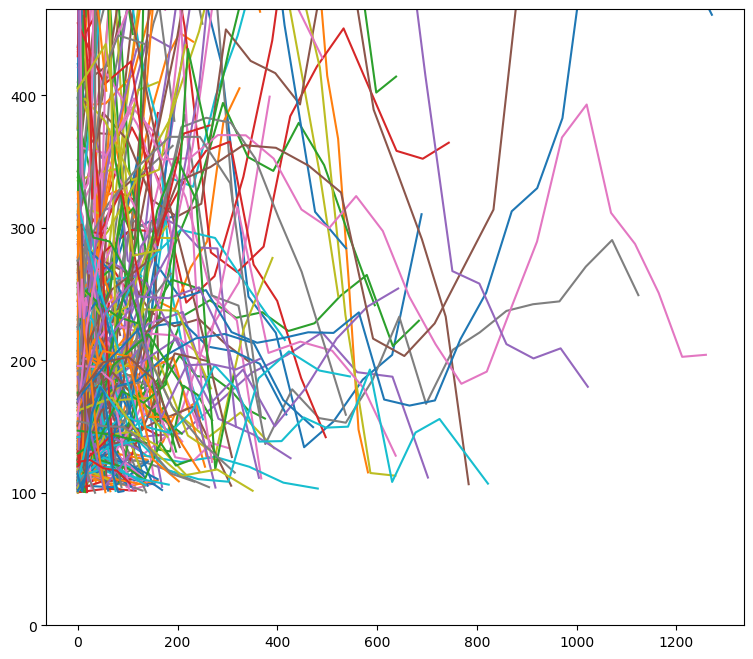

In [39]:
PyPlot.ion()
figure(figsize=(9,8))
#axis("equal")
#xlim(0.0,25.0)
ylim(0.0,465.0)

for p in values(CatenarioPozos)
    #println(p)
    #offset=p[1,4]./100
    xxpos=distanciasAcumuladas(p)#.+offset
    yypos=map(x->abs(x), p[:,3])
    plot(xxpos,yypos)
end

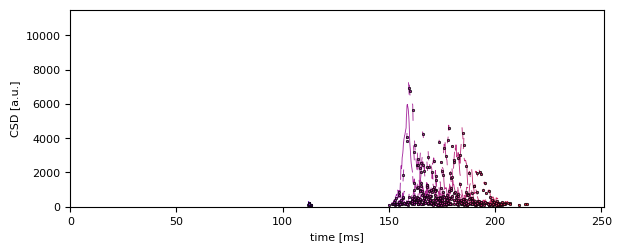

In [54]:
figure(figsize=(17.5*cm2p,6.5*cm2p))

#axis("equal")
xlim(0,tmax)
ylim(-0.0,11500.0)
fs=8
xlabel("time [ms]",fontsize=fs)
ylabel("CSD [a.u.]", fontsize=fs)
xticks(fontsize=fs)
yticks(fontsize=fs)
xlim(0,tmax)

for p in values(CatenarioPozos)
    xxpos=p[:,4]./7.022
    timecentro=mean(xxpos)
    yypos=map(x->abs(x), p[:,3])
    gordocentro=mean(yypos)
    parcor=timecentro/tmax
    cores=(parcor, 0.2*parcor, 1-parcor*parcor)
  #  println(cores)
   plot(xxpos,yypos, c=cores, lw=0.6, zorder=1)
   #print(timecentro)
    scatter(timecentro,gordocentro, color=cores, s=3 ,
        lw=0.5, edgecolor="black", zorder=10)
end

savefig("Pozos140116s2cut2_evento_2-tiempovsintensidad.svg", dpi=90)
savefig("Pozos140116s2cut2_evento_2-tiempovsintensidad.png", dpi=90)

In [28]:
nmax

UndefVarError: UndefVarError: nmax not defined

In [33]:
CatenarioPozos[20]

3×4 Array{Any,2}:
 12.2849  53.3414  -100.395  794.0
 12.3394  53.3531  -103.141  795.0
 12.3237  53.3574  -101.57   796.0

In [ ]:
PyPlot.ion()
figure(figsize=(10,7))
#axis("equal")
xlim(0.0,0.170)
ylim(0.0,4650.0)

for p in CadenasPozos
    xxpos=p[:,4]/7022
    timecentro=mean(xxpos)
    yypos=map(x->abs(x), p[:,3])
    gordocentro=mean(yypos)
    #plot(xxpos,yypos)
    scatter(timecentro,gordocentro)
end